In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from cycler import cycler
import yaml

In [2]:
#%% Plotting parameters

DPI_SAVE = 600
DPI_PLOT = 150
# typical one column figure width
FIG_WIDTH = 3.4 #8.636 cm

In [3]:
# load style

plt.style.use('./pv-textbook_inigo.mplstyle')

In [4]:
# load colors

with open('./colors.yaml') as f:
    content = f.read()
    print (content)

colors = {}
yaml_file = open("./colors.yaml", 'r')
yaml_content = yaml.safe_load(yaml_file)
for key, value in yaml_content.items():
    colors[key] = value

colorlist = [colors[key] for key in colors]
plt.rcParams['axes.prop_cycle'] = cycler(color=colorlist)

# Default colors for the book "Fundamentals of Solar Cells 
# and Photovoltaic Systems Engineering"

color1 : '#5FA1D8' #ligthblue
color2 : '#B31F20' #darkred
color3 : '#498F34' #green
color4 : '#EBD741' #darkyellow
color5 : '#F18B45' #orange
color6 : '#002060' #darkblue
color7 : '#55B99D' #turqoise
color8 : '#BDC554' #yellowgreen
color9 : '#4472C4' #blue
color10 : '#B9DEF3' #verylightblue
color11 : 'black'  #black
color12 : '#BDBDBD' #lightgray
color13 : '#696969' #gray
color14 : '#CD853F' #brown
color15 : '#FF7F50' #lightpink


In [5]:
am15_spectra=pd.read_excel('./data/astmg173.xls', sheet_name='SMARTS2')
am15g=(np.array(am15_spectra['Wvlgth nm']), np.array(am15_spectra['Global tilt W*m-2*nm-1']))

PS_rate=pd.read_excel('./data/spectral_photosynthesis_rate.xlsx', sheet_name='data')
PS_rate=(np.array(PS_rate['nm']), np.array(PS_rate['photosynthesis rate (%)']))
PS_rate_norm = (PS_rate[0], PS_rate[1]/np.max(PS_rate[1]))

s_cones=pd.read_excel('./data/spectral_sensitivity_human_cones.xlsx', sheet_name='s-cones')
s_cones=(np.array(s_cones['nm']), np.array(s_cones['norm sens']))
m_cones=pd.read_excel('./data/spectral_sensitivity_human_cones.xlsx', sheet_name='m-cones')
m_cones=(np.array(m_cones['nm']), np.array(m_cones['norm sens']))
l_cones=pd.read_excel('./data/spectral_sensitivity_human_cones.xlsx', sheet_name='l-cones')
l_cones=(np.array(l_cones['nm']), np.array(l_cones['norm sens']))

QE_Si=pd.read_excel('./data/QE_silicon_cell.xlsx', sheet_name='data')
QE_Si=(np.array(QE_Si['nm']), np.array(QE_Si['QE']))
QE_Si_norm = QE_Si[0], QE_Si[1]/np.max(QE_Si[1])

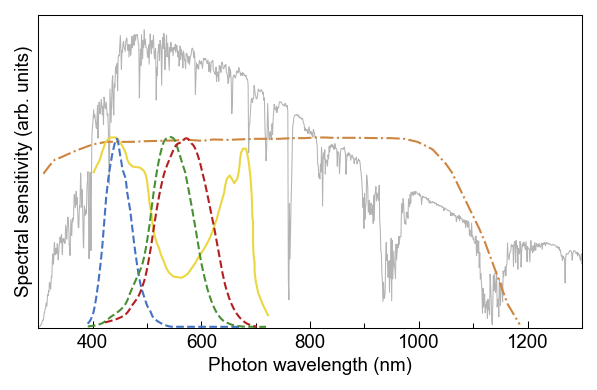

In [8]:
fig = plt.figure(figsize=(1.2*FIG_WIDTH, 2.7), dpi=DPI_PLOT)
ax = fig.add_subplot(111)

lw=1

ax.plot(am15g[0], 0.95*am15g[1], c=colors['color13'], lw=lw-0.5, alpha=0.5, zorder=0)

ax.plot(s_cones[0], s_cones[1], '--', c=colors['color9'], lw=lw, zorder=3)
ax.plot(m_cones[0], m_cones[1], '--', c=colors['color3'], lw=lw, zorder=3)
ax.plot(l_cones[0], l_cones[1], '--', c=colors['color2'], lw=lw, zorder=3)

ax.plot(PS_rate_norm[0], PS_rate_norm[1], '-', c=colors['color4'], lw=lw, zorder=2)

ax.plot(QE_Si_norm[0], QE_Si_norm[1], '-.', c=colors['color14'], lw=lw, zorder=1)

ax.set_xlim(300,1300)
ax.set_ylim(0,None)
ax.set_xlabel('Photon wavelength (nm)')
ax.set_ylabel('Spectral sensitivity (arb. units)')
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.set(yticklabels=[])  # remove the tick labels
ax.set_yticks([]) # remove the ticks

plt.tight_layout()

#plt.savefig ('./spectral_sensitivity.png', dpi=DPI_SAVE)